# Assignment Project with Yolov8

**Here's the steps that I'll be doing:**
* Getting Data Ready
* Installing Ultralytics
* Training A Custom Yolov8 Model 
* Show the Graphs on TensorBoard
* Evaluating the Assignment Model
* Visualization of Confusion Matrix and Result Graphs
* Making Predictions on the Test Data





## Getting Data Ready

In [1]:
# Import dependencies
from google.colab import drive 
import os 

# Connect to drive
drive.mount('/content/gdrive')

# Head over to the working directory
FILE_PATH = '/content/gdrive/MyDrive/RecentProjects/VisiosoftAssignment'
os.chdir(FILE_PATH)

Mounted at /content/gdrive


In [3]:
# Unzip the data
!unzip dataset.zip

Archive:  dataset.zip
replace dataset/data.yaml? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: dataset/data.yaml       
  inflating: dataset/test/images/20764_jpeg.rf.7af5db99cdf367380a2b2858dd916a2c.jpg  
  inflating: dataset/test/images/20781_jpeg.rf.81b472636185ee90ab27cddfcfa4c549.jpg  
  inflating: dataset/test/images/20829_jpeg.rf.032a2acec7d647905750aa1003b02b55.jpg  
  inflating: dataset/test/images/21108_jpeg.rf.99ed7ab27f5e6a1d96cbb36594688e64.jpg  
  inflating: dataset/test/images/21191_jpeg.rf.37dfd691f0ff2c2b50a44e87d014b6ce.jpg  
  inflating: dataset/test/images/21312_jpeg.rf.68b24f9994b7829321deb533f858595a.jpg  
  inflating: dataset/test/images/21325_jpeg.rf.98a9e9eca3990c932e8487a1a0a0496d.jpg  
  inflating: dataset/test/images/21327_jpeg.rf.2d1219f93d3ac8f8f13cb17c0e8e06b7.jpg  
  inflating: dataset/test/images/21330_jpeg.rf.cfce0a66c66d582acfe0c8466e2edb71.jpg  
  inflating: dataset/test/images/21347_jpeg.rf.706fc02a82f277ba7c27054da9b1c89a.jpg  
  inflating: 

## Installing Ultralytics

In [4]:
# Installations
!pip install ultralytics
!git clone https://github.com/ultralytics/ultralytics.git
%cd ultralytics
!yolo mode=checks

# Import YOLO
from ultralytics import YOLO

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 592.7/592.7 kB 38.5 MB/s eta 0:00:00
Cloning into 'ultralytics'...
remote: Enumerating objects: 10333, done.
remote: Counting objects: 100% (2454/2454), done.
remote: Compressing objects: 100% (1139/1139), done.
remote: Total 10333 (delta 1683), reused 1979 (delta 1311), pack-reused 7879
Receiving objects: 100% (10333/10333), 6.38 MiB | 13.17 MiB/s, done.
Resolving deltas: 100% (7005/7005), done.
Updating files: 100% (367/367), done.
/content/gdrive/MyDrive/RecentProjects/VisosoftAssignment/ultralytics
WARNING ⚠️ 'yolo mode=checks' is deprecated. Use 'yolo checks' instead.
Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


### Training A Custom Yolov8 Model 
**I'll be using:**
* lr: 0.01
* optimizer: SGD
* batch size: 2
* epochs: 300
* image size: 640
* device: GPU

In [6]:
# Train the model
!yolo task=detect mode=train model=yolov8x.pt data=/content/gdrive/MyDrive/RecentProjects/VisiosoftAssignment/dataset/data.yaml epochs=300 imgsz=640 batch=2 optimizer=SGD lr0=0.01 device=0

100% 131M/131M [00:00<00:00, 184MB/s]
Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/gdrive/MyDrive/RecentProjects/VisosoftAssignment/dataset/data.yaml, epochs=300, patience=50, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fal

### Show the Graphs on TensorBoard

In [16]:
# Show the Outputs on TensorBoard
%tensorboard --logdir /content/gdrive/MyDrive/RecentProjects/VisiosoftAssignment/ultralytics/runs/detect/train

<IPython.core.display.Javascript object>

### Evaluating the Assignment Model

In [17]:
# Evaluate the model that I trained
!yolo task=detect mode=val model=/content/gdrive/MyDrive/RecentProjects/VisiosoftAssignment/ultralytics/runs/detect/train/weights/last.pt data=/content/gdrive/MyDrive/RecentProjects/VisosoftAssignment/dataset/data.yaml

Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68125494 parameters, 0 gradients
val: Scanning /content/gdrive/MyDrive/RecentProjects/VisosoftAssignment/dataset/valid/labels.cache... 96 images, 0 backgrounds, 0 corrupt: 100% 96/96 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:11<00:00,  1.88s/it]
                   all         96        375      0.709      0.409       0.47      0.253
             SignStore         96        321      0.642      0.433      0.469      0.257
Utility Pole Information Plate         96         54      0.776      0.385       0.47       0.25
Speed: 11.8ms preprocess, 57.5ms inference, 0.0ms loss, 9.4ms postprocess per image
Results saved to runs/detect/val


## Visualization of Confusion Matrix and Result Graphs

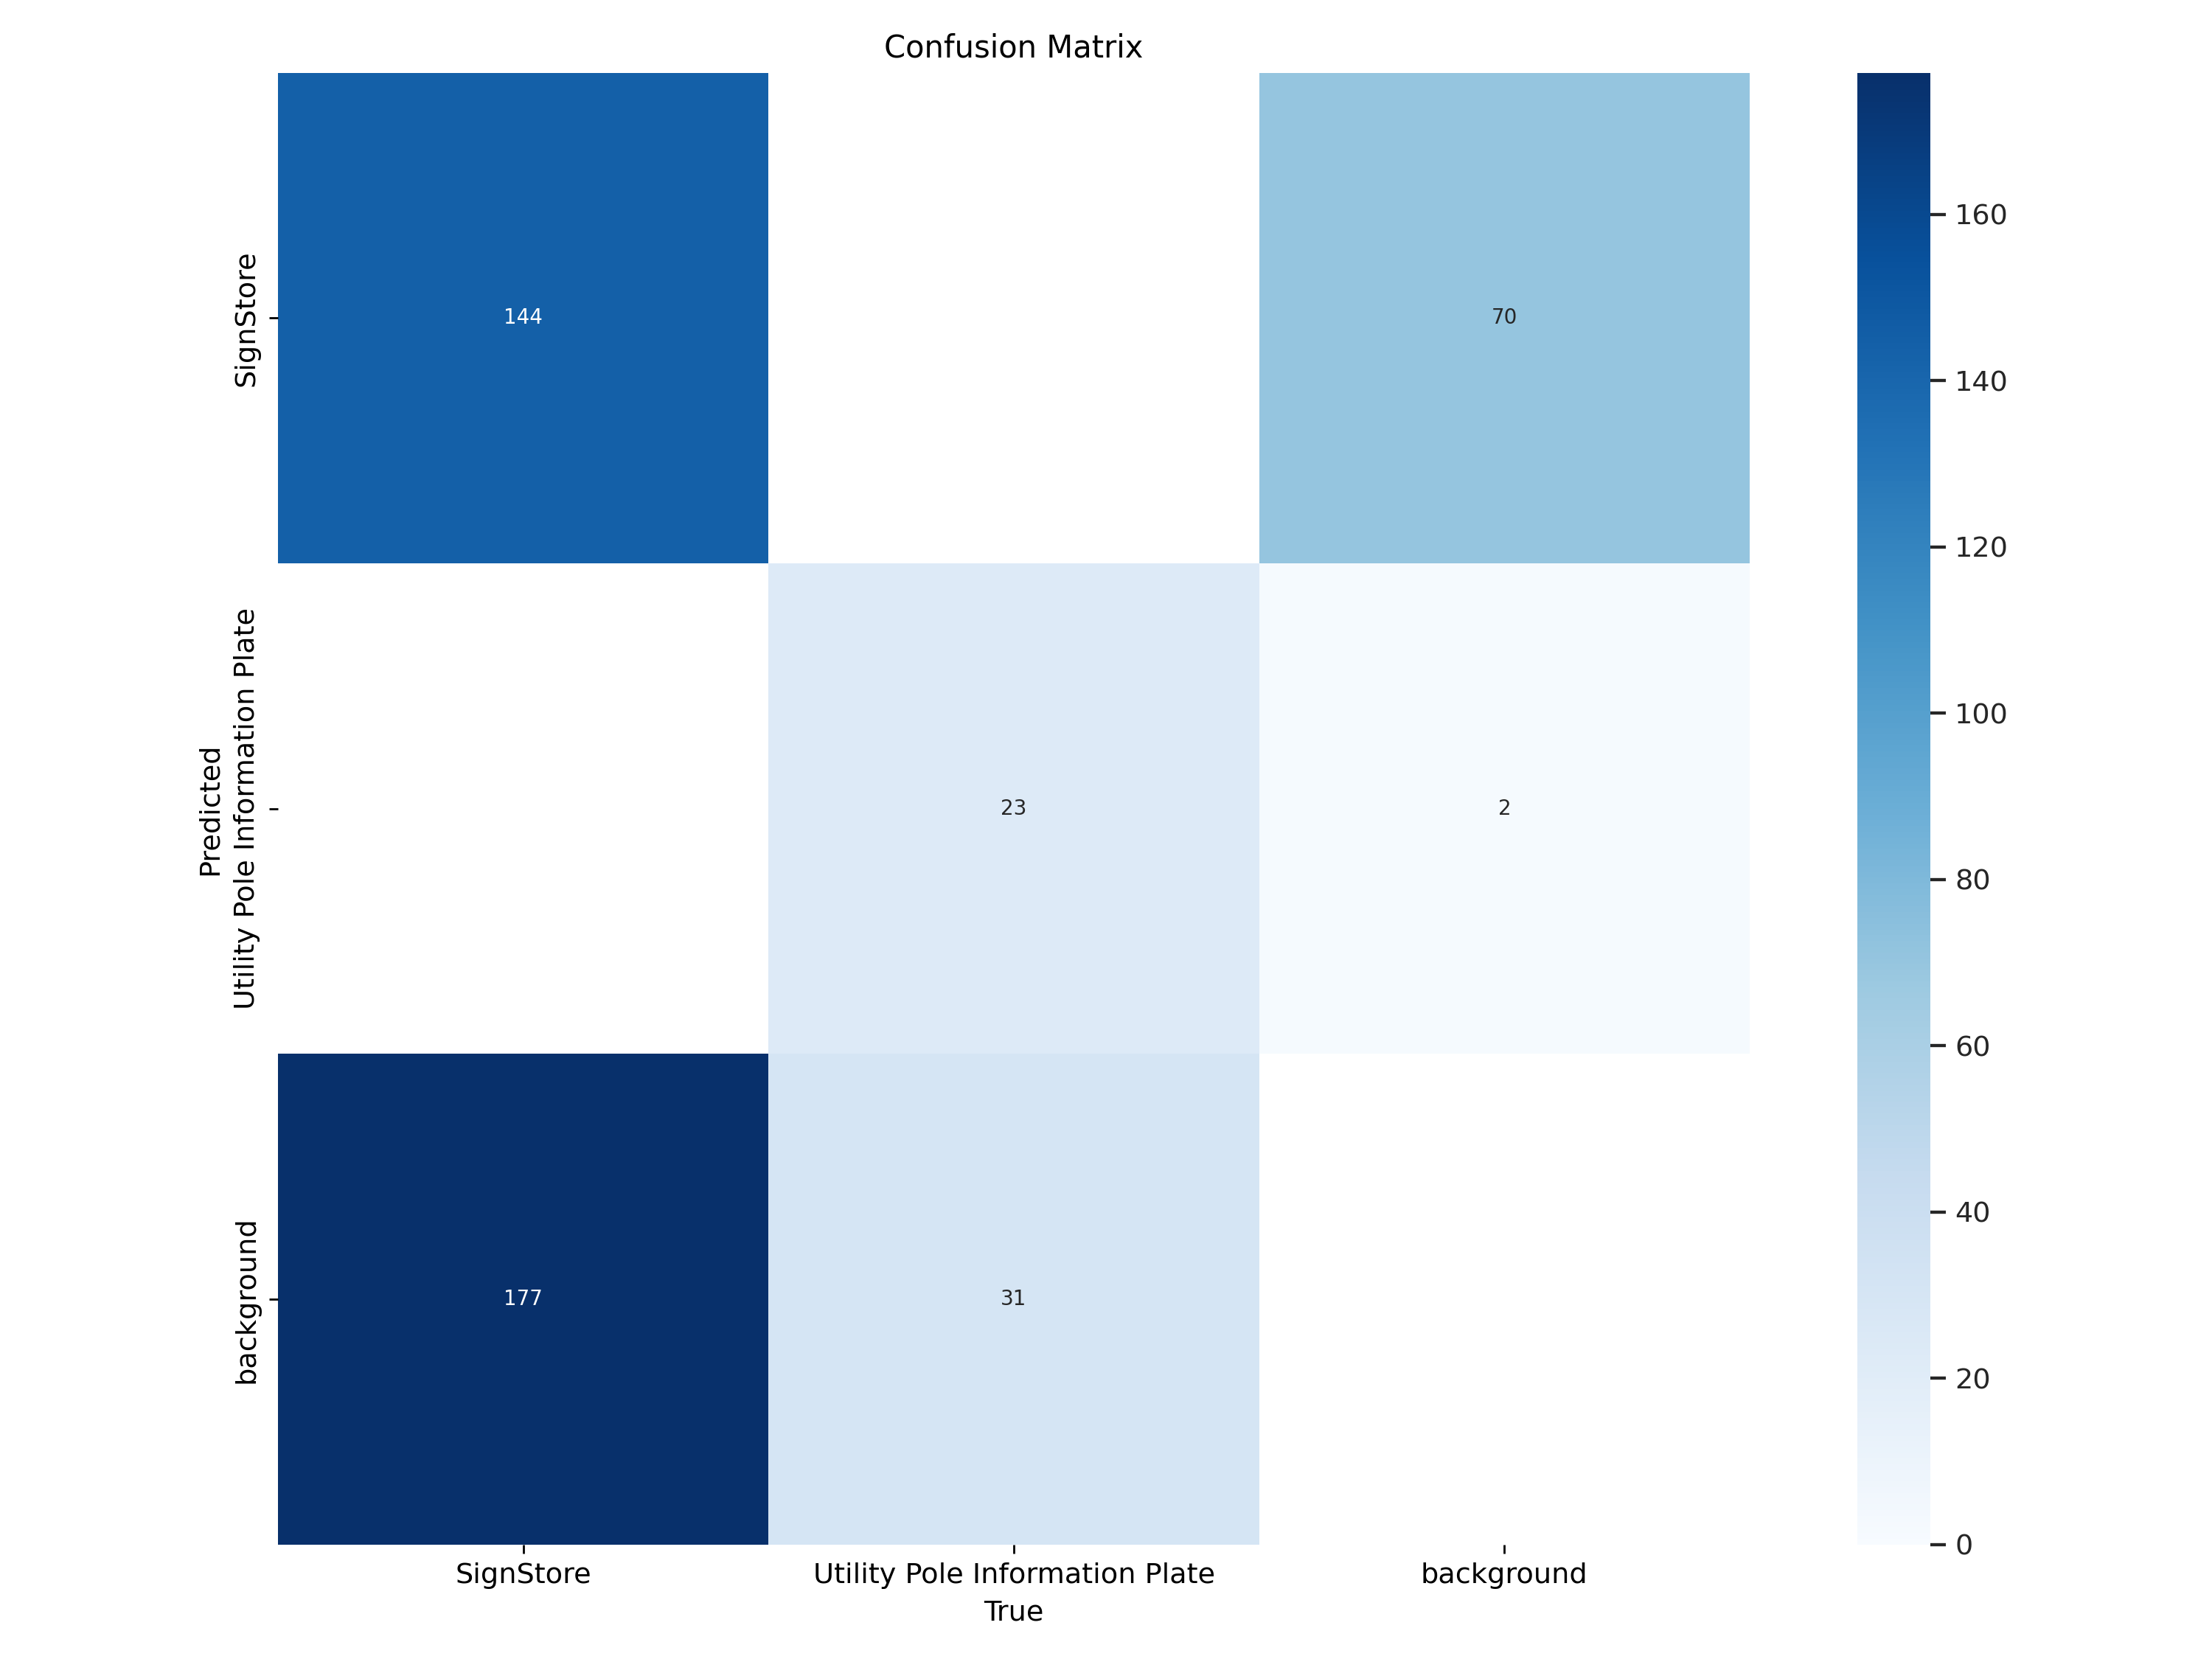

In [18]:
# Import Image method to demonstrate the confusion matrix
from IPython.display import Image

# Illustrate the confusion matrix
Image(filename=f'/content/gdrive/MyDrive/RecentProjects/VisiosoftAssignment/ultralytics/runs/detect/train/confusion_matrix.png', width=600)

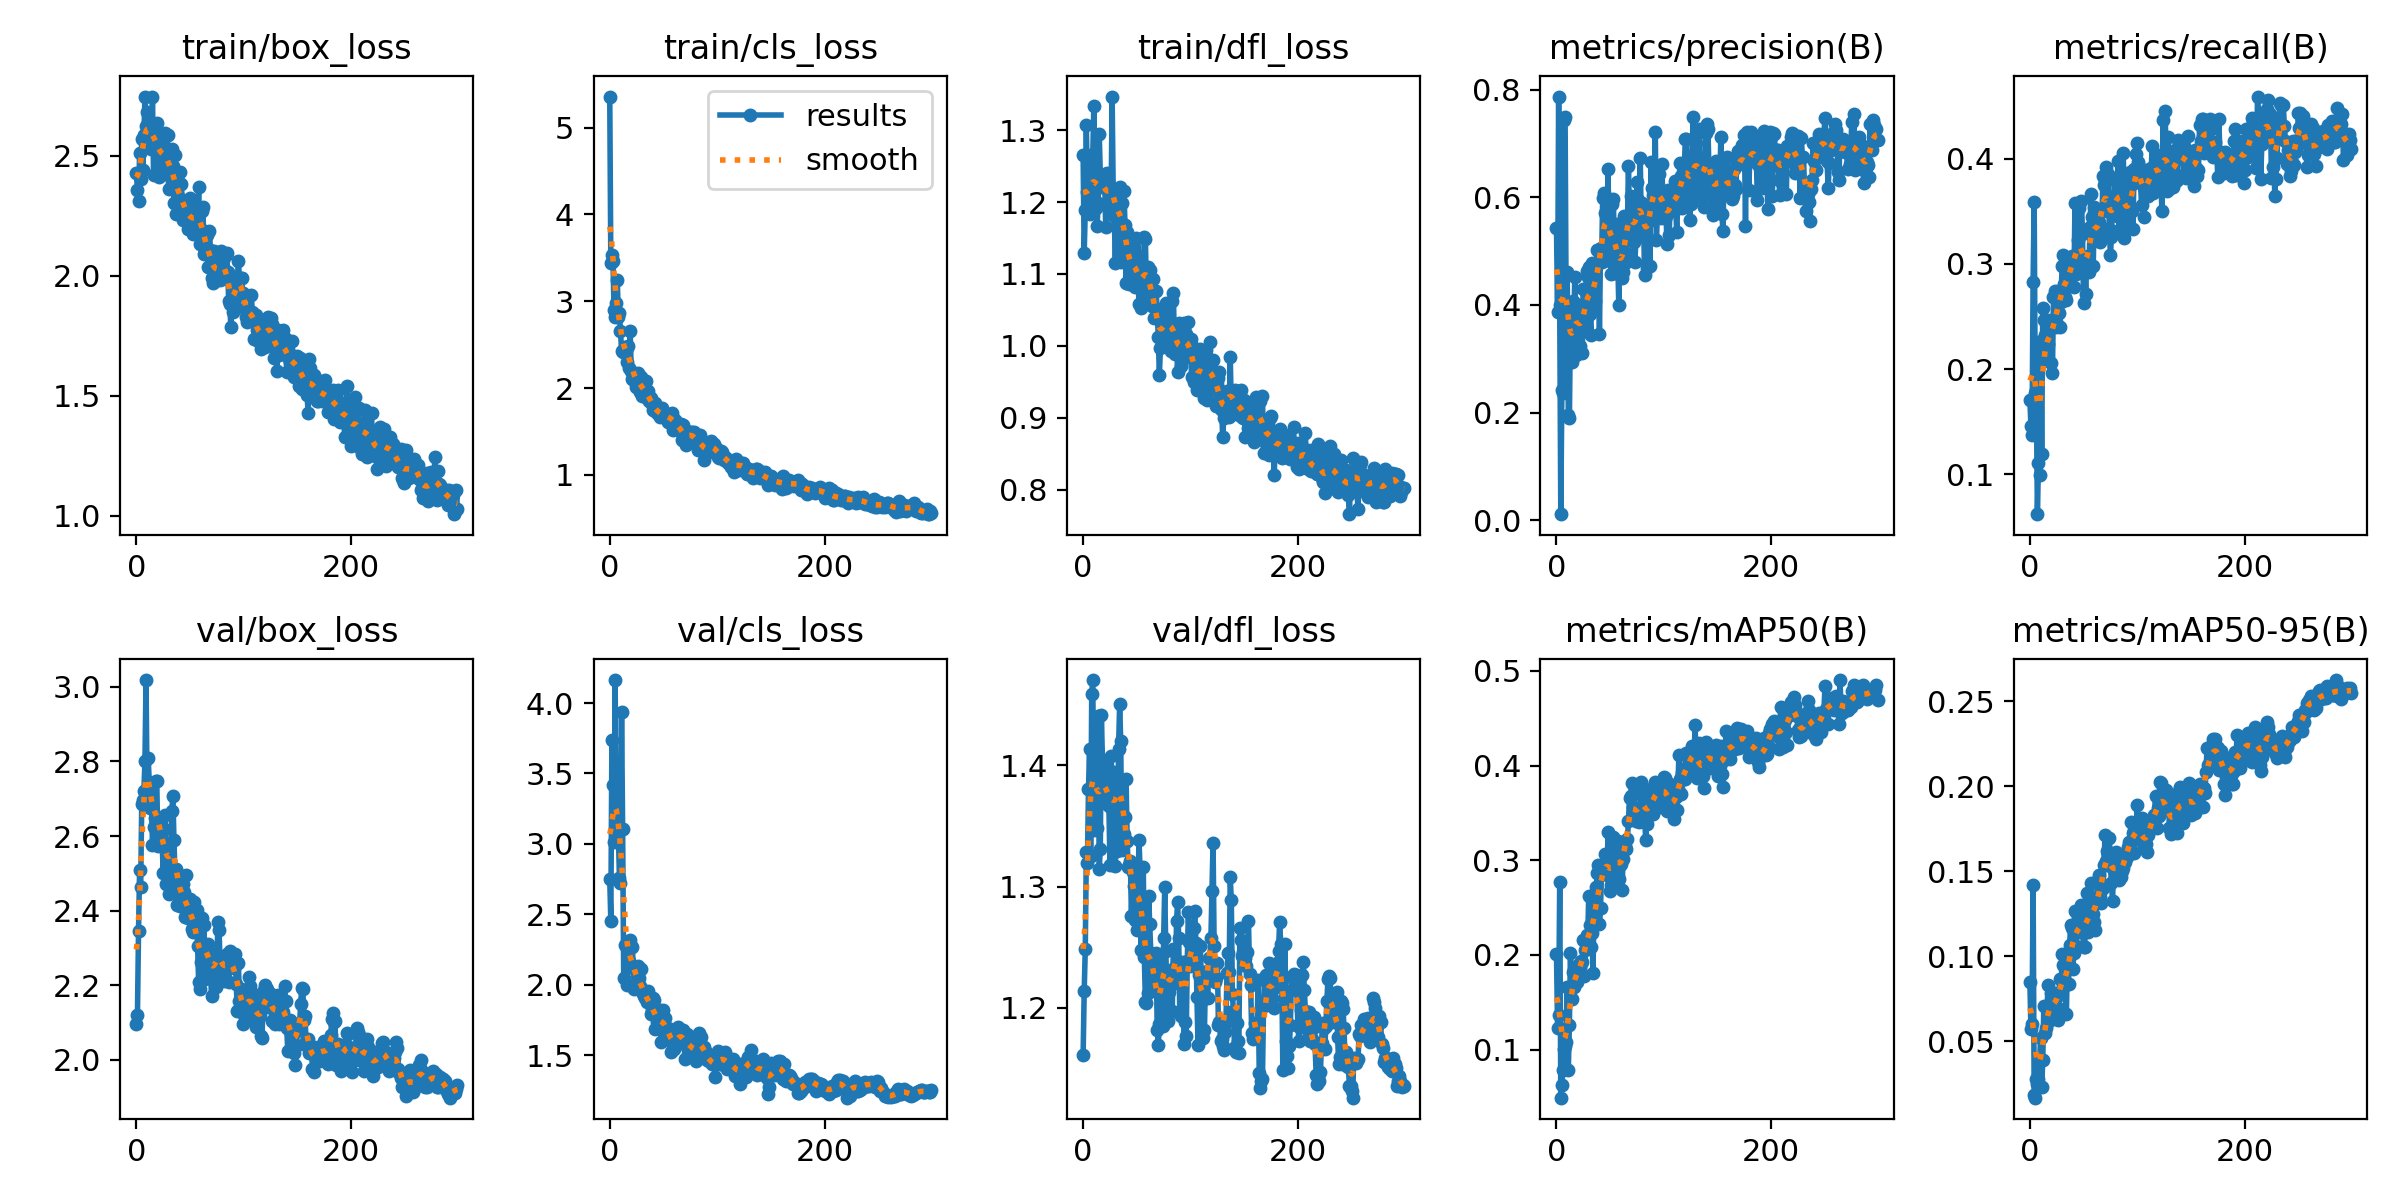

In [35]:
# Import Image method to demonstrate the confusion matrix
from IPython.display import Image

# Illustrate the confusion matrix
Image(filename=f'/content/gdrive/MyDrive/RecentProjects/VisiosoftAssignment/ultralytics/runs/detect/train/results.png', width=1500)

## Making Predictions on the Test Data

In [22]:
# Make predictions with conf = 0.60
!yolo task=detect mode=predict model=/content/gdrive/MyDrive/RecentProjects/VisiosoftAssignment/ultralytics/runs/detect/train/weights/last.pt conf=0.60 source=/content/gdrive/MyDrive/RecentProjects/VisosoftAssignment/dataset/test/images

Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68125494 parameters, 0 gradients

image 1/48 /content/gdrive/MyDrive/RecentProjects/VisosoftAssignment/dataset/test/images/20764_jpeg.rf.7af5db99cdf367380a2b2858dd916a2c.jpg: 640x640 (no detections), 97.9ms
image 2/48 /content/gdrive/MyDrive/RecentProjects/VisosoftAssignment/dataset/test/images/20781_jpeg.rf.81b472636185ee90ab27cddfcfa4c549.jpg: 640x640 (no detections), 51.8ms
image 3/48 /content/gdrive/MyDrive/RecentProjects/VisosoftAssignment/dataset/test/images/20829_jpeg.rf.032a2acec7d647905750aa1003b02b55.jpg: 640x640 (no detections), 51.1ms
image 4/48 /content/gdrive/MyDrive/RecentProjects/VisosoftAssignment/dataset/test/images/21108_jpeg.rf.99ed7ab27f5e6a1d96cbb36594688e64.jpg: 640x640 (no detections), 50.0ms
image 5/48 /content/gdrive/MyDrive/RecentProjects/VisosoftAssignment/dataset/test/images/21191_jpeg.rf.37dfd691f0ff2c2b50a44e87d014b6ce.jpg: 640x640 2 

In [23]:
# Make predictions with conf=0.30
!yolo task=detect mode=predict model=/content/gdrive/MyDrive/RecentProjects/VisiosoftAssignment/ultralytics/runs/detect/train/weights/last.pt conf=0.30 source=/content/gdrive/MyDrive/RecentProjects/VisosoftAssignment/dataset/test/images

Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68125494 parameters, 0 gradients

image 1/48 /content/gdrive/MyDrive/RecentProjects/VisosoftAssignment/dataset/test/images/20764_jpeg.rf.7af5db99cdf367380a2b2858dd916a2c.jpg: 640x640 (no detections), 79.3ms
image 2/48 /content/gdrive/MyDrive/RecentProjects/VisosoftAssignment/dataset/test/images/20781_jpeg.rf.81b472636185ee90ab27cddfcfa4c549.jpg: 640x640 (no detections), 59.0ms
image 3/48 /content/gdrive/MyDrive/RecentProjects/VisosoftAssignment/dataset/test/images/20829_jpeg.rf.032a2acec7d647905750aa1003b02b55.jpg: 640x640 (no detections), 57.4ms
image 4/48 /content/gdrive/MyDrive/RecentProjects/VisosoftAssignment/dataset/test/images/21108_jpeg.rf.99ed7ab27f5e6a1d96cbb36594688e64.jpg: 640x640 (no detections), 50.2ms
image 5/48 /content/gdrive/MyDrive/RecentProjects/VisosoftAssignment/dataset/test/images/21191_jpeg.rf.37dfd691f0ff2c2b50a44e87d014b6ce.jpg: 640x640 2 